In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modeling/Churn_Modelling.csv


In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [145]:
import warnings
warnings.filterwarnings("ignore")

#  Anomaly Detection —
Anomaly detection is the process of identifying rare items, events, or observations which raise suspicions by differing significantly from the majority of the data.

## Popular Techniques

| Method                    | Type          | Description                                                           |
| ------------------------- | ------------- | --------------------------------------------------------------------- |
| **IQR Method**            | Statistical   | Detects outliers based on interquartile range. |
| **Z-Score**               | Statistical   | Measures how many standard deviations a point is from the mean.       |
| **Isolation Forest**      | ML-Based      | Randomly partitions data and isolates anomalies.                      |
| **One-Class SVM**         | ML-Based      | Learns a boundary around "normal" data.                               |
| **Autoencoders (Neural)** | Deep Learning | Learns to compress and reconstruct; poor reconstructions = anomalies. |
| **DBSCAN**                | Clustering    | Finds points that don't belong to any dense cluster.                  |


# Loading Dataset

In [146]:
df = pd.read_csv("/kaggle/input/churn-modeling/Churn_Modelling.csv")

In [147]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [148]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [149]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [150]:
target_class = "Exited"

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns.to_list()
cat_cols = df.select_dtypes(include=["object"]).columns.to_list()

In [151]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [152]:
numeric_cols.remove("Exited")

In [153]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [154]:
cat_cols

['Geography', 'Gender']

### Boxplot for each numeric columns one by one  

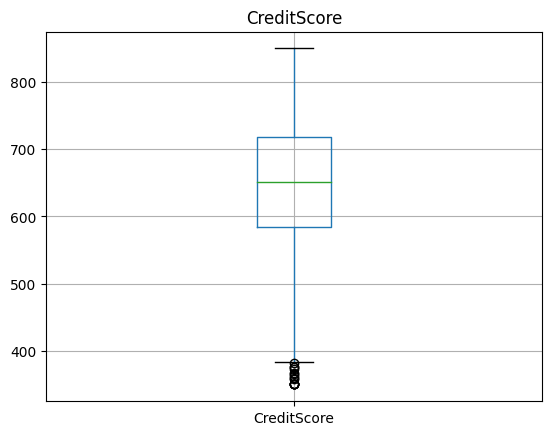

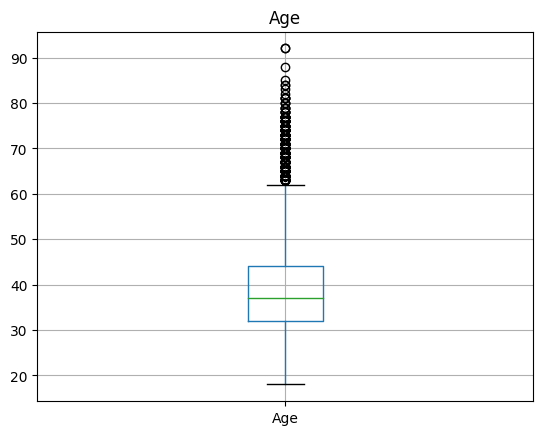

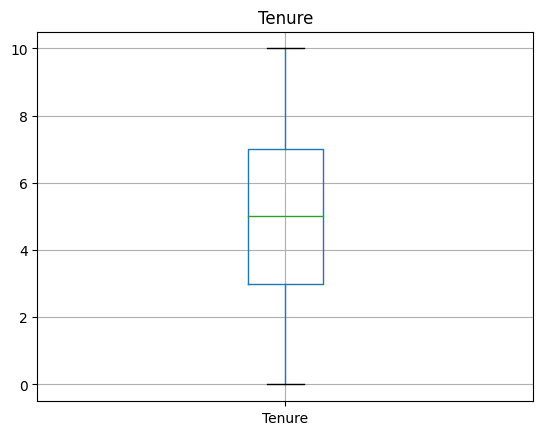

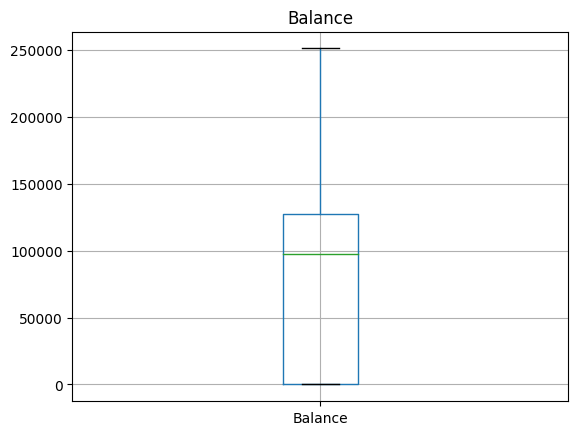

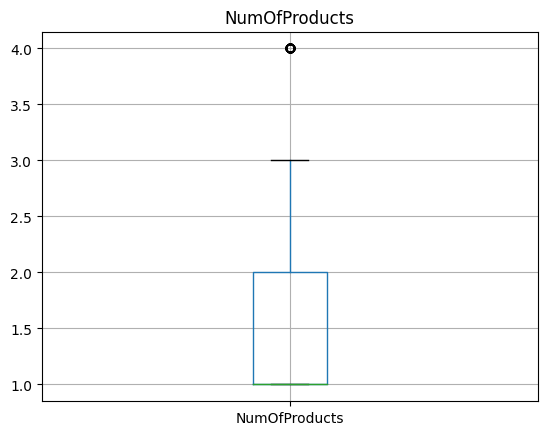

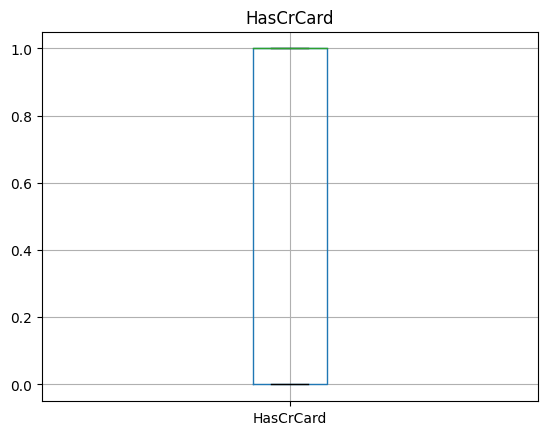

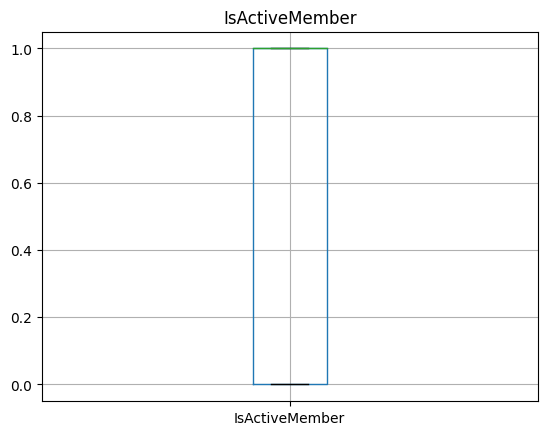

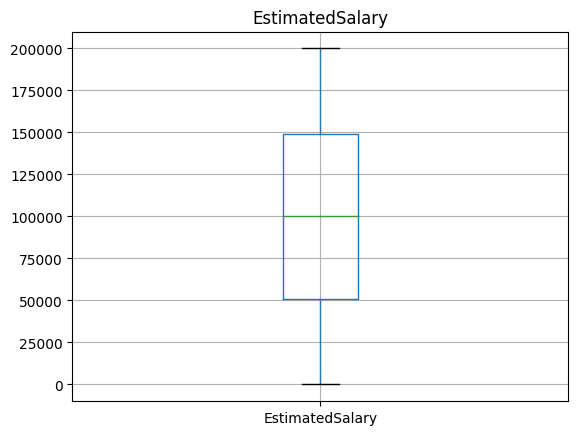

In [155]:
for col in df:
    if col in numeric_cols:
        plt.figure()
        plt.gca().set_title(col)
        df.boxplot(col)

# Outlier Detection using Inter Quartile Range (IQR) 

IQR = Q3 -Q1

values above `Q3 + 1.5 * IQR` and value below `Q1 - 1.5 * IQR` are outliers.



__Steps to perform Outlier Detection by identifying the lowerbound and upperbound of the data:__

1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)


In [156]:
numeric_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

## Arange the data in ascending order 

In [157]:
df["CreditScore"] = np.sort(df['CreditScore'])

In [158]:
for col in numeric_cols:
    df[col] = np.sort(df[col])

In [159]:
df["EstimatedSalary"]

0           11.58
1           90.07
2           91.75
3           96.27
4          106.67
          ...    
9995    199909.32
9996    199929.17
9997    199953.33
9998    199970.74
9999    199992.48
Name: EstimatedSalary, Length: 10000, dtype: float64

In [160]:
# for col in numeric_cols:
    
#     q1 = np.nanpercentile(df[col], 25, method='midpoint')
#     q2 = np.nanpercentile(df[col], 50, method='midpoint')
#     q3 = np.nanpercentile(df[col], 75, method='midpoint')

#     iqr = q3 -q1
    
#     sns.boxplot(data=df[col], width=0.5, fliersize=3)
#     plt.title(f"Boxplot for {col} Before the Treatment of Outliers")
#     plt.show()

#     #calculating the upper and lower limit for the outliers
#     lower_limit = q1 - 1.5 * iqr 
#     upper_limit = q3 + 1.5 * iqr

#     # outliers
#     lower_limitoutliers = df[col] [df[col] < lower_limit]
#     upper_limitoutliers = df[col] [df[col] > upper_limit]

#     # treating outliers
#     df[col] [df[col] < lower_limit] = lower_limit
#     df[col] [df[col] > upper_limit] = upper_limit 
    
#     # printing the insights
#     print(f"Interquartile range for {col} is {iqr:.2f}")
#     print(f"Upper Limit for {col}: {upper_limit}")
#     print(f"Lower Limit for {col}: {lower_limit}")
#     print(f"Upper Limit Outliers for {col}: {upper_limitoutliers} ")
#     print(f"Lower Limit Outliers for {col}: {lower_limitoutliers} ")


#     sns.boxplot(data=df[col], width=0.5, fliersize=3)
#     plt.title(f"Boxplot for {col} After the Treatment of Outliers")
#     plt.show()

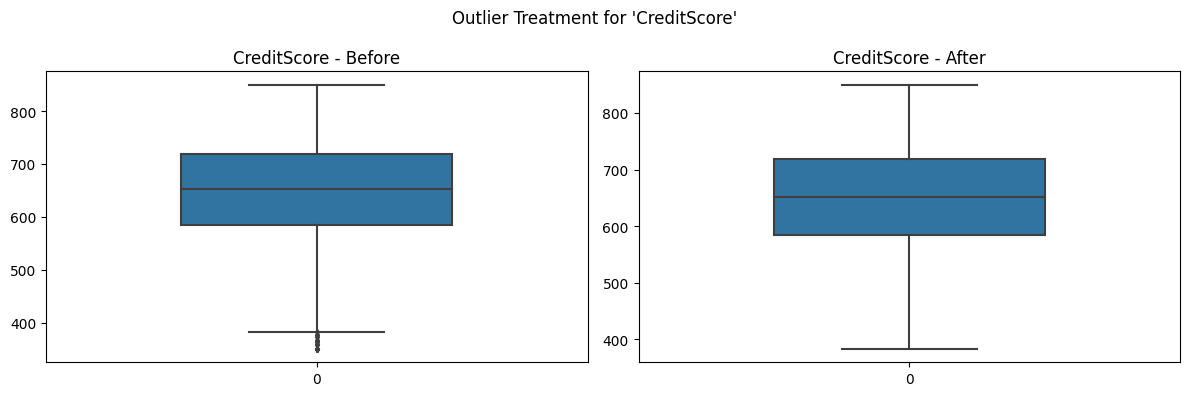


Interquartile Range for 'CreditScore': 134.00
Lower Limit: 383.0
Upper Limit: 919.0
Total Outliers Treated in 'CreditScore': 15
Lower Outliers Count: 15
Upper Outliers Count: 0


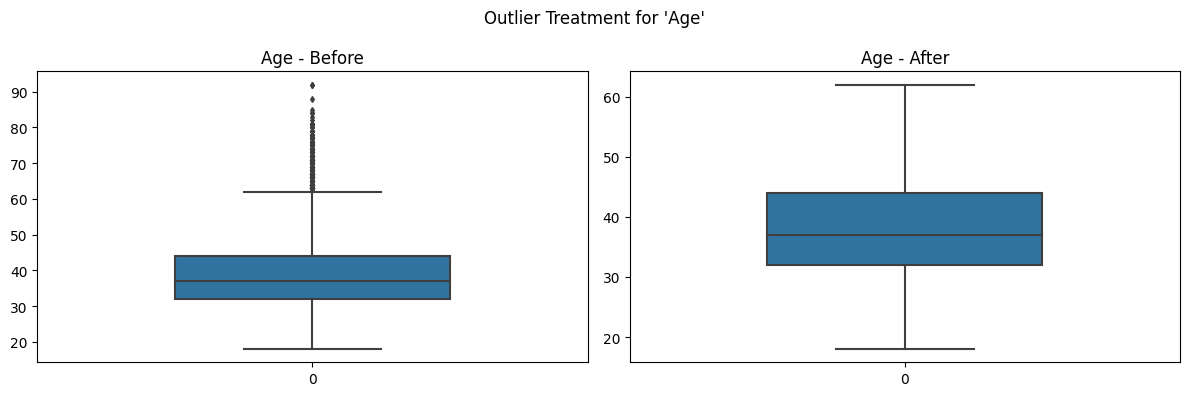


Interquartile Range for 'Age': 12.00
Lower Limit: 14.0
Upper Limit: 62.0
Total Outliers Treated in 'Age': 359
Lower Outliers Count: 0
Upper Outliers Count: 359


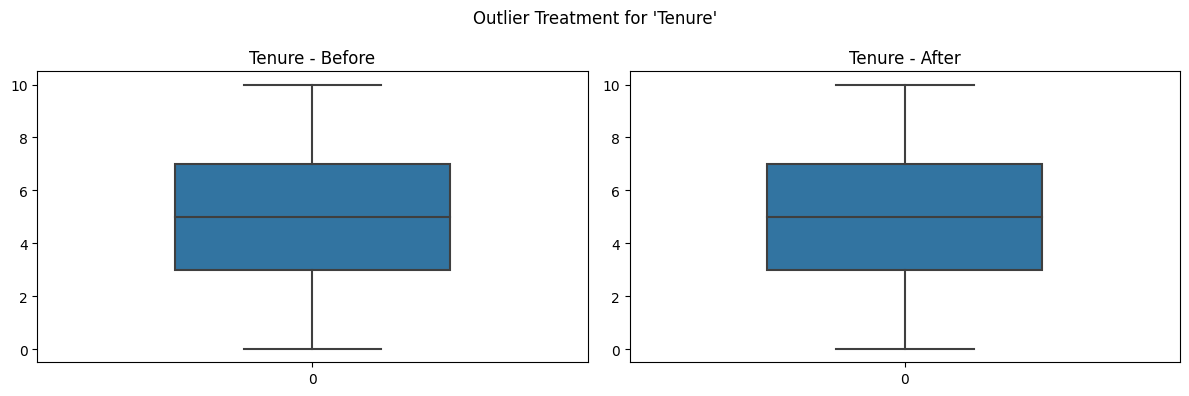


Interquartile Range for 'Tenure': 4.00
Lower Limit: -3.0
Upper Limit: 13.0
Total Outliers Treated in 'Tenure': 0
Lower Outliers Count: 0
Upper Outliers Count: 0


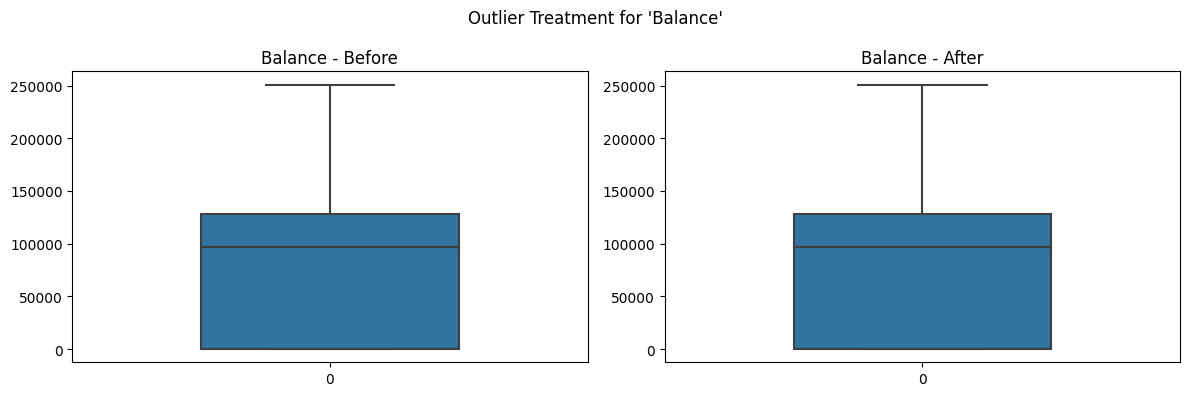


Interquartile Range for 'Balance': 127646.04
Lower Limit: -191469.06
Upper Limit: 319115.1
Total Outliers Treated in 'Balance': 0
Lower Outliers Count: 0
Upper Outliers Count: 0


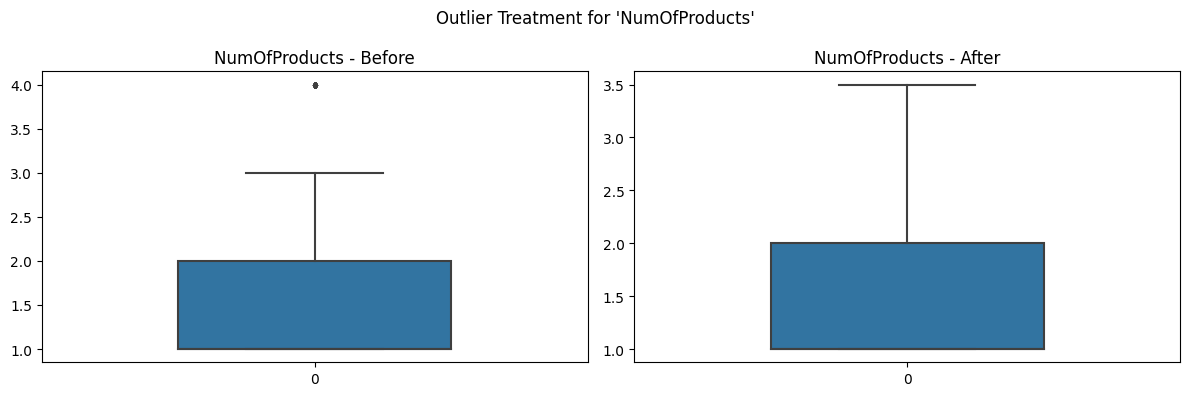


Interquartile Range for 'NumOfProducts': 1.00
Lower Limit: -0.5
Upper Limit: 3.5
Total Outliers Treated in 'NumOfProducts': 60
Lower Outliers Count: 0
Upper Outliers Count: 60


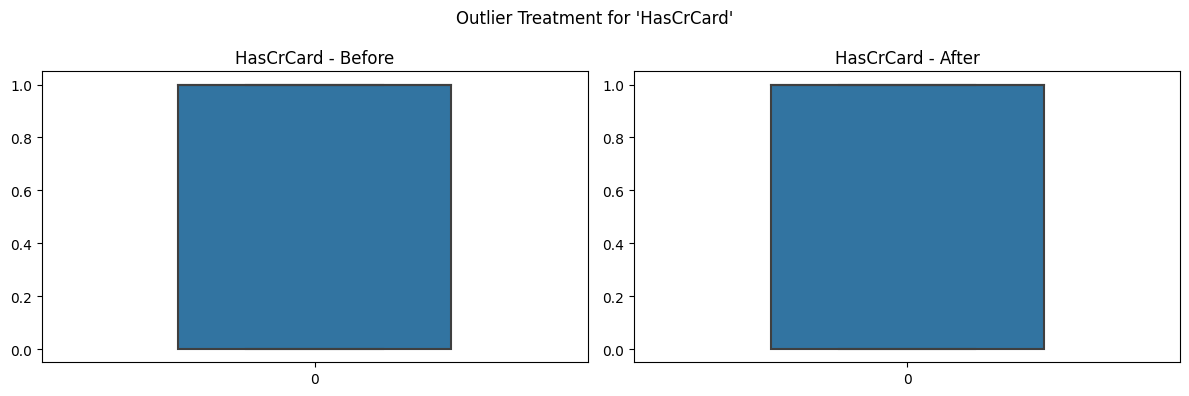


Interquartile Range for 'HasCrCard': 1.00
Lower Limit: -1.5
Upper Limit: 2.5
Total Outliers Treated in 'HasCrCard': 0
Lower Outliers Count: 0
Upper Outliers Count: 0


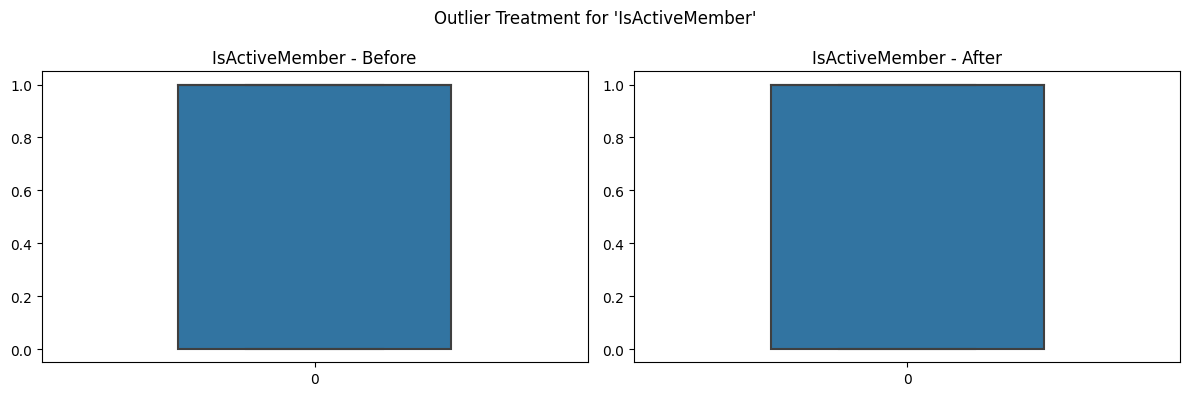


Interquartile Range for 'IsActiveMember': 1.00
Lower Limit: -1.5
Upper Limit: 2.5
Total Outliers Treated in 'IsActiveMember': 0
Lower Outliers Count: 0
Upper Outliers Count: 0


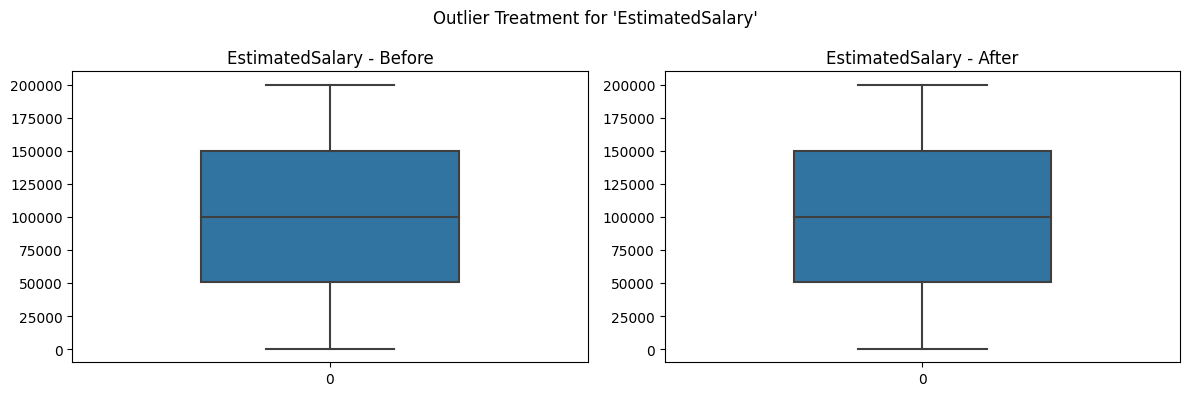


Interquartile Range for 'EstimatedSalary': 98399.14
Lower Limit: -96605.77250000002
Upper Limit: 296990.7675
Total Outliers Treated in 'EstimatedSalary': 0
Lower Outliers Count: 0
Upper Outliers Count: 0


In [161]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

for col in numeric_cols:
    # Compute quartiles and IQR
    q1 = np.nanpercentile(df[col], 25, method='midpoint')
    q3 = np.nanpercentile(df[col], 75, method='midpoint')
    iqr = q3 - q1

    # Outlier limits
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Identify outliers
    lower_outliers = df[df[col] < lower_limit][col]
    upper_outliers = df[df[col] > upper_limit][col]

    # Count total outliers
    total_outliers = lower_outliers.count() + upper_outliers.count()

    # Store original values for "before" plot
    original_values = df[col].copy()

    # Treat outliers (capping method)
    df.loc[df[col] < lower_limit, col] = lower_limit
    df.loc[df[col] > upper_limit, col] = upper_limit

    # 📊 Subplots for Before and After Boxplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data=original_values, width=0.5, fliersize=3, ax=axes[0])
    axes[0].set_title(f"{col} - Before")

    sns.boxplot(data=df[col], width=0.5, fliersize=3, ax=axes[1])
    axes[1].set_title(f"{col} - After")

    plt.suptitle(f"Outlier Treatment for '{col}'")
    plt.tight_layout()
    plt.show()

    # 📌 Print outlier stats
    print(f"\nInterquartile Range for '{col}': {iqr:.2f}")
    print(f"Lower Limit: {lower_limit}")
    print(f"Upper Limit: {upper_limit}")
    print(f"Total Outliers Treated in '{col}': {total_outliers}")
    print(f"Lower Outliers Count: {lower_outliers.count()}")
    print(f"Upper Outliers Count: {upper_outliers.count()}")
